In [1]:
from visualization_utils import TruthData
import torch
from plotly.subplots import make_subplots

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [2]:
layer=14
model_size='13B-2'

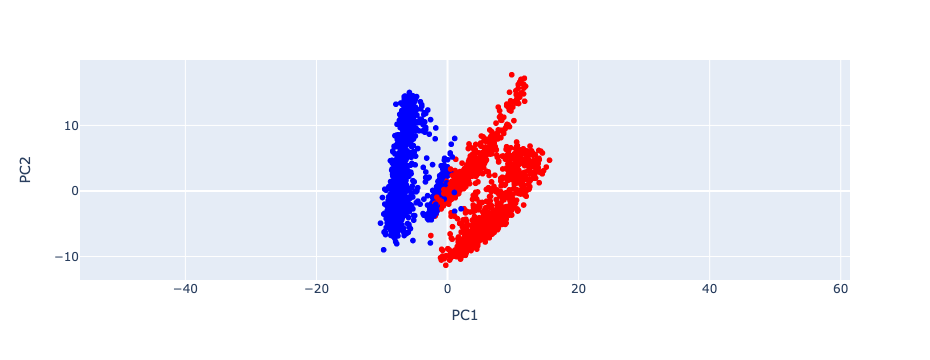

In [4]:
TruthData.from_datasets(
    ['cities', 'neg_cities'], # datasets to use
    model_size=model_size,
    layer=layer,
    center=True,
    device=device
).plot(
    dimensions=2, # 3 dimensions also supported
    dim_offset=0, # increase if you want to ignore the first few PCs
    color='label',
    # if you don't want to plot and do PCA on all datasets:
    # plot_datasets = [ list of datasets to plot here ],
    # pca_datasets = [ list of datasets to use for PCA here]
)

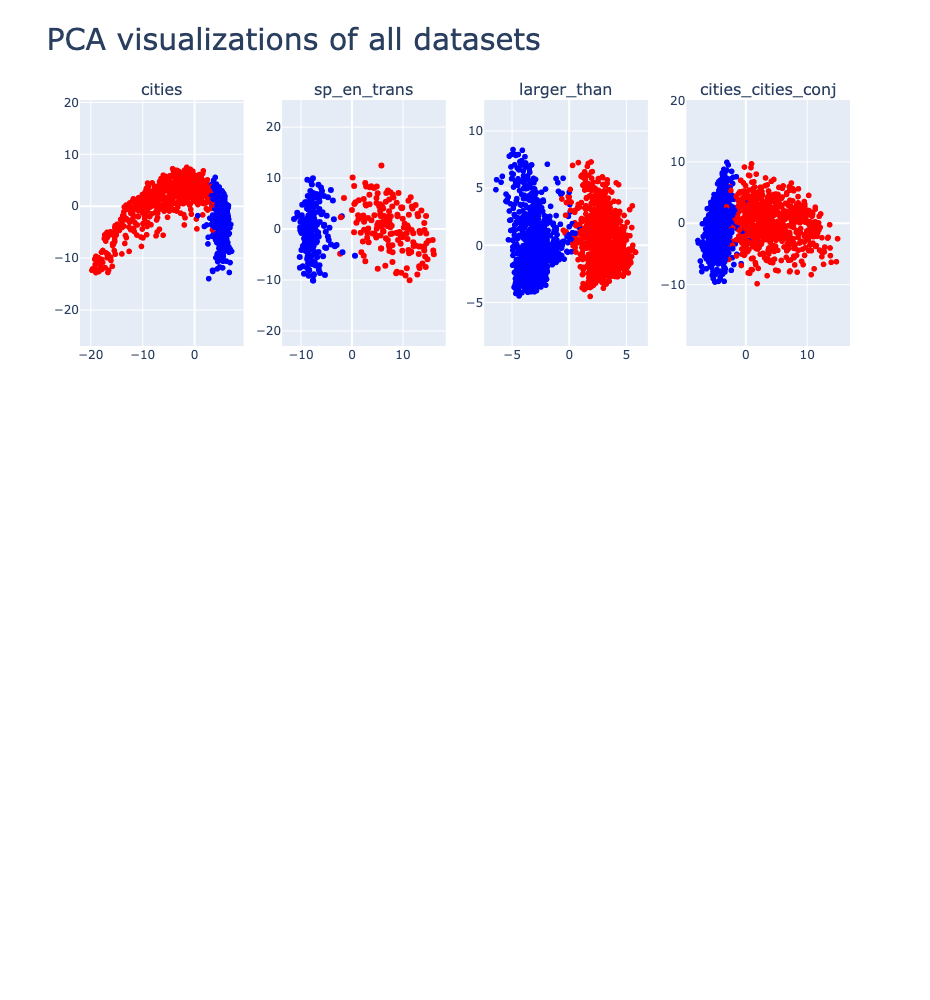

In [31]:
# visualization of all datasets
datasets = [
    'cities',
    # 'neg_cities',
    'sp_en_trans',
    # 'neg_sp_en_trans',
    'larger_than',
    # 'smaller_than',
    'cities_cities_conj',
    # 'cities_cities_disj',
    # 'companies_true_false',
    # 'common_claim_true_false',
    # 'counterfact_true_false'
]

td = TruthData.from_datasets(
    datasets,
    model_size=model_size,
    layer=layer,
    device=device)

fig = make_subplots(rows=3, cols=4, subplot_titles=datasets, horizontal_spacing=0.05, vertical_spacing=0.05)
for i, dataset in enumerate(datasets):
    for data in td.plot(
        dimensions=2,
        color='label',
        plot_datasets = [dataset],
        pca_datasets = [dataset],
        ).data:
        fig.add_trace(
            data, row=(i // 4) + 1, col=(i % 4) + 1
        )

for row in range(3):
    for col in range(4):
        fig.update_yaxes(
            scaleanchor = f"x{row * 4 + col + 1}",
            scaleratio = 1,
            row=row+1,
            col=col+1,
        )

fig.update_coloraxes(
    colorscale = 'Bluered_r'
)

fig.update_layout(
    height=1000,
    width=1000,
    showlegend=False,
    title = {
        'text' : 'PCA visualizations of all datasets',
        'font' : {'size' : 30}
    },
    coloraxis_showscale=False,
)

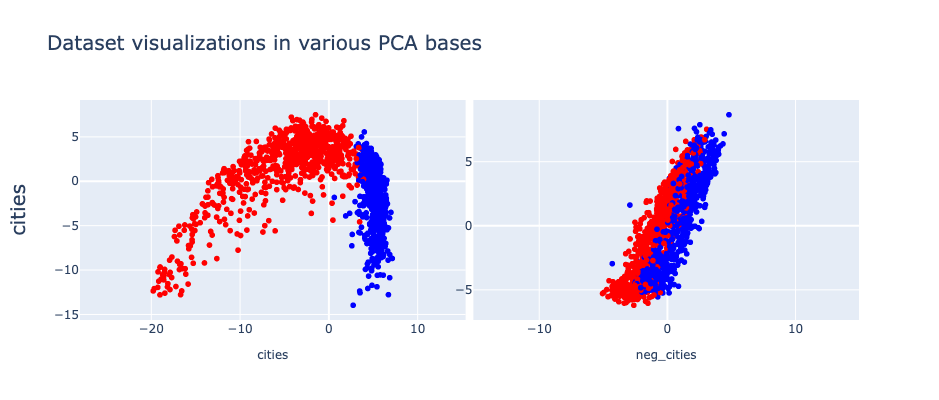

In [3]:
pca_datasets = [
    'cities',
    # 'larger_than',
    # 'sp_en_trans',
    # 'likely'
]

plot_datasets = [
    'cities',
    'neg_cities',
    # 'larger_than',
    # 'smaller_than',
    # 'sp_en_trans',
    # 'neg_sp_en_trans',
    # 'cities_cities_conj',
    # 'cities_cities_disj',
    # 'companies_true_false',
    # 'common_claim_true_false'
]

layer = layer

fig = make_subplots(rows=len(pca_datasets), cols=len(plot_datasets), 
    vertical_spacing=0.05, horizontal_spacing=0.01,
    )

for col, plot_dataset in enumerate(plot_datasets):
    fig.update_xaxes(title= {
                    'text': plot_dataset,
                    'font' : {'size' : 12},
                    },
                    row=len(pca_datasets), col=col+1
                )
for row, pca_dataset in enumerate(pca_datasets):
    fig.update_yaxes(title= {
                    'text': pca_dataset,
                    'font' : {'size' : 20}
                    },
                    row=row+1, col=1
                )

td = TruthData.from_datasets(plot_datasets, model_size=model_size, layer=layer, device=device)

for row, pca_dataset in enumerate(pca_datasets):
    for col, plot_dataset in enumerate(plot_datasets):
        subfig = td.plot(
            dimensions = 2,
            plot_datasets = [plot_dataset],
            pca_datasets = [pca_dataset],
            color='label',
        )
        fig.add_trace(subfig.data[0], row=row+1, col=col+1)

for row in range(len(pca_datasets)):
    for col in range(len(plot_datasets)):
        fig.update_yaxes(
            scaleanchor = f"x{row * len(plot_datasets) + col + 1}",
            scaleratio = 1,
            row=row+1,
            col=col+1,
        )

fig.update_coloraxes(
    colorscale = 'Bluered_r'
)

fig.update_layout(
    height=400,
    width=1100,
    coloraxis_showscale=False,
    title = {
        'text': f'Dataset visualizations in various PCA bases',
        'font' : {'size' : 20}
    }
)

fig.show()

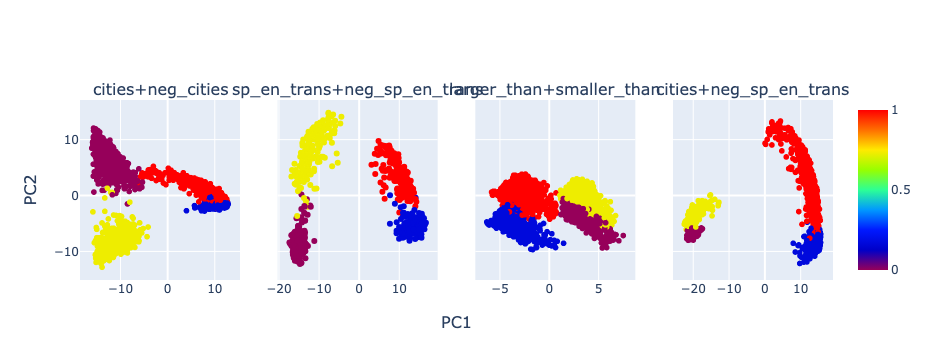

In [5]:
from plotly.subplots import make_subplots

pairs = [
    ['cities', 'neg_cities'],
    ['sp_en_trans', 'neg_sp_en_trans'],
    ['larger_than', 'smaller_than'],
    ['cities', 'neg_sp_en_trans']
]
layer = layer

# colormappings under the Rainbow colorscale
RED = 1
BLUE = .17
PURPLE = 0
YELLOW = .73

fig = make_subplots(rows=1, cols=len(pairs),
                    shared_yaxes=True,
                    x_title='PC1', y_title='PC2',
                    subplot_titles=[ '+'.join([dataset for dataset in pair]) for pair in pairs]
                    )

for i, pair in enumerate(pairs):
    td = TruthData.from_datasets(
        pair,
        model_size=model_size,
        layer=layer,
        device=device,
        center=False
    )

    
    td.df.loc[pair[0], 'label'] = td.df.loc[pair[0]]['label'].apply(lambda x: BLUE if x == 1 else RED).values
    td.df.loc[pair[1], 'label'] = td.df.loc[pair[1]]['label'].apply(lambda x: YELLOW if x == 1 else PURPLE).values


    subfig = td.plot(
        dimensions=2,
        color = 'label',
    )

    fig.add_trace(subfig.data[0], row=1, col=i+1)

fig.update_coloraxes(
    colorscale='Rainbow'
)

fig.show()

In [34]:
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

# datasets = ['sp_en_trans', 'larger_than', 'cities_cities_conj']
# layers = [13, 14]

# figs = [[] for _ in datasets]

# for i, dataset in enumerate(datasets):
#     for layer in layers:
#         fig = TruthData.from_datasets(
#             [dataset],
#             model_size='13B',
#             layer=layer,
#             device=device
#             ).plot(
#                 dimensions=2,
#                 color='label',
#             )
#         figs[i].append(fig)

# fig = make_subplots(rows = len(datasets), cols = len(layers),
#                     subplot_titles=[f"layer {layer}" for layer in layers],
#                     vertical_spacing=0.05)

# for i, dataset in enumerate(datasets):
#     for j, layer in enumerate(layers):
#         for data in figs[i][j].data:
#             data['showlegend'] = False
#             fig.add_trace(data, row=i+1, col=j+1)

# for i, dataset in enumerate(datasets):
#     fig.update_yaxes(title_text=dataset, row=i+1, col=1)

# fig.update_coloraxes(
#     colorscale='Bluered_r'
# )

# fig.update_layout(height=800, width=1200, coloraxis_showscale=False)

# fig.update_layout(
#     title = {
#         'text' : f"Dataset visualizations across layers",
#         'font' : {'size' : 20},
#     }
# )

# # fig.write_image('junk/layer_sweep.png')

# fig.show()